In [31]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [32]:
problem = tsplib95.load("a280.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [33]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


35274.07687588224

In [34]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(45, 95), (95, 68), (68, 206), (206, 230), (230, 105), (105, 12), (12, 40), (40, 177), (177, 31), (31, 38), (38, 163), (163, 89), (89, 218), (218, 99), (99, 175), (175, 241), (241, 146), (146, 139), (139, 76), (76, 237), (237, 200), (200, 33), (33, 152), (152, 222), (222, 210), (210, 179), (179, 174), (174, 272), (272, 239), (239, 84), (84, 98), (98, 26), (26, 165), (165, 90), (90, 244), (244, 123), (123, 156), (156, 75), (75, 226), (226, 133), (133, 124), (124, 6), (6, 154), (154, 52), (52, 62), (62, 170), (170, 250), (250, 167), (167, 87), (87, 233), (233, 61), (61, 268), (268, 190), (190, 279), (279, 212), (212, 140), (140, 135), (135, 118), (118, 134), (134, 42), (42, 242), (242, 225), (225, 204), (204, 235), (235, 55), (55, 158), (158, 150), (150, 191), (191, 53), (53, 269), (269, 211), (211, 149), (149, 88), (88, 15), (15, 132), (132, 207), (207, 34), (34, 110), (110, 60), (60, 173), (173, 46), (46, 274), (274, 253), (253, 129), (129, 78), (78, 247), (247

In [35]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

2586.7696475631606


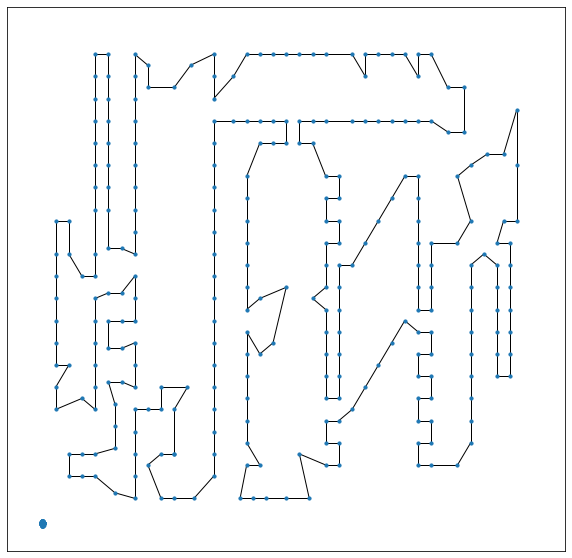

In [36]:
solution = tsplib95.load("a280.opt.tour").tours[0]
solution = get_edge_list(solution)
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[], ax=axs)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution, ax=axs)
print(get_fitness(solution))

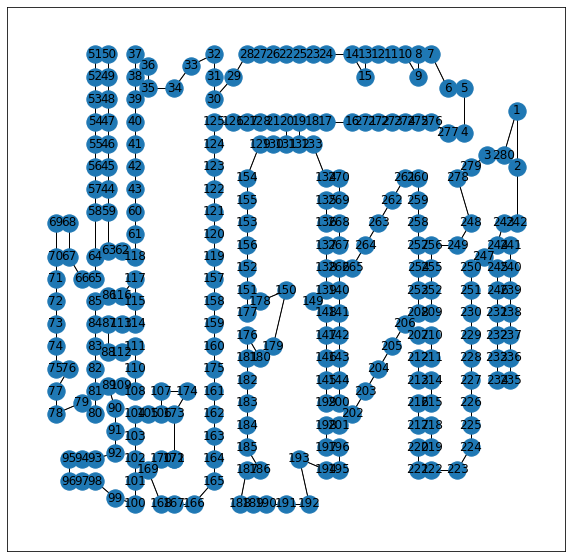

In [37]:
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)


In [38]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

3192.037652320606


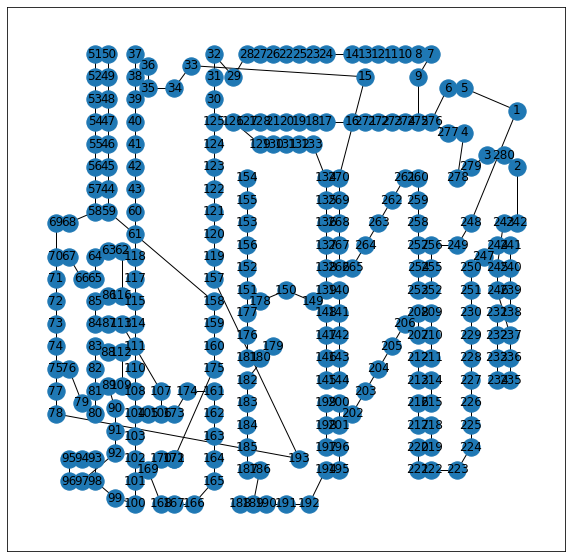

In [39]:
path = f.closest_neighbour_alg(G)
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=f.get_edge_list(path), ax=axs)
print(f.get_fitness(G,f.get_edge_list(path)))
# 0 not in [2]
# G.nodes[3]